In [2]:
import tensorflow as tf
import numpy as np
import random

# Set random seed for TensorFlow
tf.random.set_seed(42)

# Set random seed for NumPy
np.random.seed(42)

# Set random seed for Python's built-in random module
random.seed(42)

from pathlib import Path
import imghdr
import os


data_dir = "hair_types"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)

C:\Users\Sara Limeta\AppData\Local\Temp\ipykernel_29336\2275838807.py:15: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

image_size = (128, 128)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "hair_types/",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    labels='inferred',
    label_mode='categorical'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "hair_types/",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size, 
    labels='inferred',
    label_mode='categorical'
)

Found 985 files belonging to 3 classes.
Using 788 files for training.
Found 985 files belonging to 3 classes.
Using 197 files for validation.


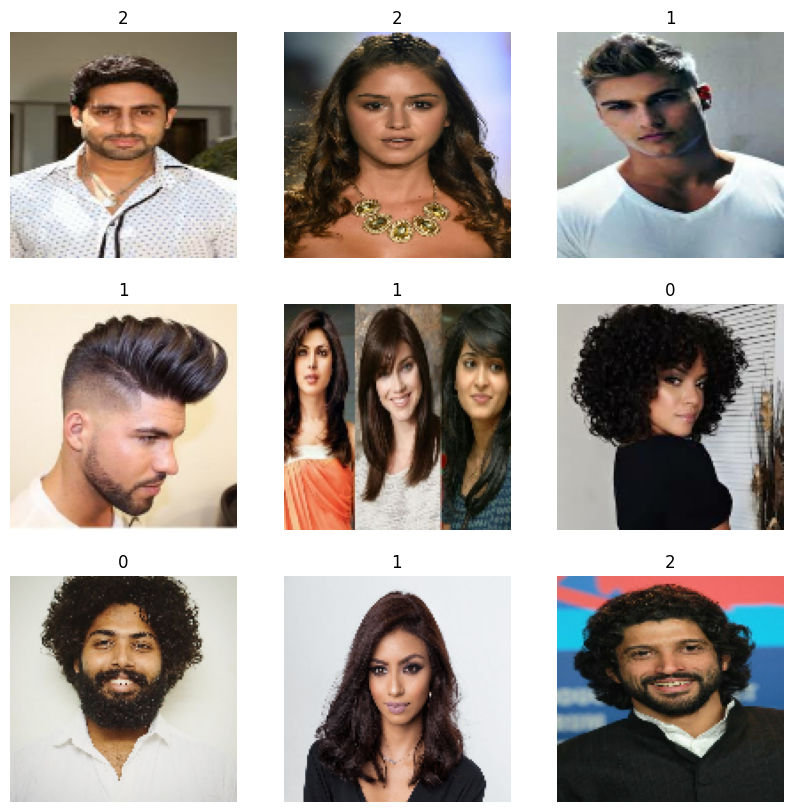

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(np.argmax(labels[i])))
        plt.axis("off")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(keras.Input(shape=image_size + (3,))) # 64, 64, 3
model.add(layers.Rescaling(1.0 / 255))

model.add(layers.Conv2D(filters=4, kernel_size=16, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(filters=8, kernel_size=8, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(filters=16, kernel_size=4, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64))
model.add(layers.Activation("relu"))
model.add(layers.Dense(3))
model.add(layers.Activation("softmax"))

tf.keras.utils.plot_model(model, to_file='model_test.png', show_shapes=True)

epochs = 50

from tensorflow.keras.callbacks import EarlyStopping

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=[callback])

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.3316 - loss: 1.0991 - val_accuracy: 0.2843 - val_loss: 1.0999
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.3605 - loss: 1.0981 - val_accuracy: 0.2843 - val_loss: 1.1008
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.3418 - loss: 1.0987 - val_accuracy: 0.2843 - val_loss: 1.1012
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.3550 - loss: 1.0985 - val_accuracy: 0.2843 - val_loss: 1.1015
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.3452 - loss: 1.0964 - val_accuracy: 0.2843 - val_loss: 1.0919
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.4023 - loss: 1.0878 - val_accuracy: 0.3655 - val_loss: 1.0914
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.3867 - loss: 1.0689 - val_accuracy: 0.4416 - val_loss: 1.0779
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.4669 - loss: 1.0471 - val_accuracy: 0.3655 - v

In [ ]:
model.summary()

In [ ]:
img = keras.preprocessing.image.load_img(
    "hair_types/Curly_Hair/02dac897d1dec9ba8c057a11d041ada8--layered-natural-hair-natural-black-hairstyles.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
print(
    "This image is %.2f percent curly hair, %.2f percent straight hair, and %.2f percent wavy hair."
    % tuple(predictions[0])
)
